# Import

In [2]:
import numpy as np
from pypianoroll import *
from matplotlib import pyplot as plt
import os

# first tests with pypianoroll


In [2]:
file = os.path.join("./training_data", "b97c529ab9ef783a849b896816001748.npz")
multitrack = Multitrack(file)
# or: another_multitrack = pypianoroll.load(file)

In [3]:
print(multitrack)

tracks : [POLYSYNTH, FINGERDBAS, CLEAN GTR , MUTED GTR, SWEEP PAD, DRUMS],
tempo : [105.00157502 105.00157502 105.00157502 ... 105.00157502 105.00157502
 105.00157502],
downbeat : [ True False False ... False False False],
beat_resolution : 24,
name : 05f21994c71a5f881e64f45c8d706165


In [4]:
print(multitrack.tracks[1])

pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]],
program : 33,
is_drum : False,
name : FINGERDBAS


In [11]:
pypianoroll.binarize(multitrack)

Multitrack(tracks=['POLYSYNTH', 'FINGERDBAS', 'CLEAN GTR ', 'MUTED GTR', 'SWEEP PAD', 'DRUMS'], tempo=array([105.00157502, 105.00157502, 105.00157502, ..., 105.00157502,
       105.00157502, 105.00157502]), downbeat=array([ True, False, False, ..., False, False, False]), beat_resolution=24, name=05f21994c71a5f881e64f45c8d706165)

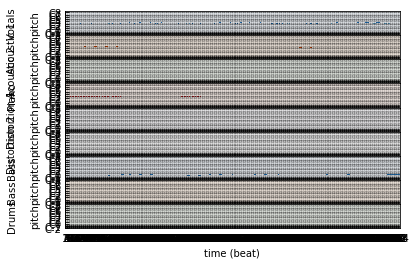

In [14]:
fig, axs = multitrack.plot()
plt.show()

(<Figure size 432x288 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBCD739E48>,
       dtype=object))

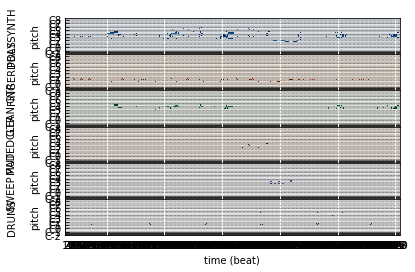

In [9]:
pypianoroll.plot_multitrack(multitrack)

# load, save and convert pianoroll

In [15]:
multitrack.write('./test.mid')

(<Figure size 432x288 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1B2028C88>,
       dtype=object))

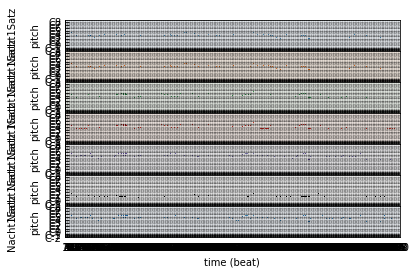

In [13]:
# create roll from midi
another_multitrack = Multitrack('./training_data/test.mid')
pypianoroll.plot_multitrack(another_multitrack)

# first test must be verify pianoroll, because every metric does this first too.

In [9]:
another_multitrack.tracks[1]

Track(pianoroll=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), program=28, is_drum=False, name=TOUCHINT)

In [29]:
another_multitrack.tracks[1].pianoroll

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
pypianoroll.check_pianoroll(another_multitrack.tracks[1].pianoroll)

True

In [24]:
pypianoroll.metrics.empty_beat_rate(another_multitrack.tracks[1].pianoroll, 24)

0.9096153846153846

# How to insert into Neural Network? How to build Neural Network

In [36]:
#loop for track extraktion?
for i in range(0, len(another_multitrack.tracks)): 
    print(another_multitrack.tracks[i].pianoroll) 
    # print(another_multitrack.tracks[i]) 

pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]],
program : 106,
is_drum : False,
name : TOUCHINT
pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]],
program : 28,
is_drum : False,
name : TOUCHINT
pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]],
program : 24,
is_drum : True,
name : TOUCHINT
pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]],
program : 75,
is_drum : False,
name : TOUCHINT
pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]],
program : 108,
is_drum : False,
name : TOUCHINT
pianoroll :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 

In [38]:
# gleiche Programme kombinieren!!!!!!!!
# another_multitrack.
another_multitrack.tracks[0].program

106

# Binarized

In [4]:
print(multitrack.tracks[0].pianoroll)
multitrack.tracks[0].binarize()
print("\n", "\n", multitrack.tracks[0].pianoroll)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# fuse Tracks together, if program (Instrument) is the same

In [4]:
file = os.path.join(("./training_data", "b97c529ab9ef783a849b896816001748.npz")
multitrack = Multitrack(file)

# Passe Tempo an meiste Tempo an, da tempo[0] für komplettwen track sonst genommen wird!
multitrack.tempo[0] = multitrack.tempo[5]
multitrack.tempo[1] = multitrack.tempo[5]
multitrack.tempo[2] = multitrack.tempo[5]
multitrack.tempo[3] = multitrack.tempo[5]
# Tracks transfer, if nessesary/for testing
supertrack = Multitrack(tracks=[multitrack.tracks[0], multitrack.tracks[1]], tempo=multitrack.tempo,
                        downbeat=multitrack.downbeat, beat_resolution=multitrack.beat_resolution)
#See Tracks & rolls
supertrack.tracks
supertrack.plot() # All tracks plotted
supertrack.tracks[0].plot() # Spezific Track Plotting
print(supertrack.tracks[0].program) # Track Instrument
print(supertrack.tracks[1].program)
print(len(supertrack.tracks)) # Amount Tracks

In [78]:
# actually merging Process, Different modes: 'sum', 'max', 'any'   empfohlen: 'max'
supertrack.merge_tracks(track_indices=[0,1], mode='max', program=supertrack.tracks[0].program, name=supertrack.tracks[0].name, 
                        is_drum=supertrack.tracks[0].is_drum, remove_merged="true")

supertrack.write('./test1.mid') # save fused track for future 

# Testgelände

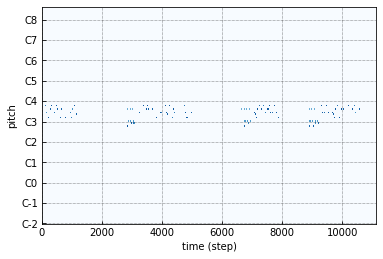

In [12]:
fig, axs = another_multitrack.tracks[0].plot()
plt.show()

In [5]:
print(multitrack.tracks[0].pianoroll[0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [6]:
print(len(multitrack.tracks[0].pianoroll[0]))

128


In [7]:
print(len(multitrack.tracks[0].pianoroll))

2592


# Numpy Array full view


In [12]:
import sys
import numpy
numpy.get_printoptions()

{'edgeitems': 3,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

In [19]:
import sys
numpy.set_printoptions(threshold=sys.maxsize)

In [20]:
numpy.get_printoptions()

{'edgeitems': 3,
 'threshold': 9223372036854775807,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}